In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

from data_loading import MinMaxScaler
import tensorflow as tf
import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data real loading
data_name = 'sine'
seq_len = 24

if data_name in ['stock', 'energy']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 20
  ori_data = sine_data_generation(no, seq_len, dim)

print(data_name + ' dataset is ready.')

sine dataset is ready.


In [4]:
# load the generated data -- Abu's data
src_path = "/data/home/stufs1/zuwang/dg21/TimeGAN/"
filename = "abhu_data_dim20.csv"

seq_len = 24
syn_data = np.loadtxt(os.path.join(src_path, filename), delimiter = ",",skiprows = 1)
syn_data = MinMaxScaler(syn_data)

temp_data = []    
for i in range(0, len(syn_data) - seq_len):
    _x = syn_data[i:i + seq_len]
    temp_data.append(_x)

# Mix the datasets (to make it similar to i.i.d)
idx = np.random.permutation(len(temp_data))    
syn_data = []
for i in range(len(temp_data)):
    syn_data.append(temp_data[idx[i]])

syn_data = np.asarray(syn_data)
print("syn_data shape", syn_data.shape)
#syn_data = syn_data[:,:,:1] #choose the first one

syn_data shape (1048551, 24, 20)


In [5]:
np.asarray(ori_data).shape, np.asarray(syn_data).shape

((10000, 24, 20), (1048551, 24, 20))

In [6]:
# normalization-again for training.
norm_constant = np.max(syn_data)
ori_data = ori_data / norm_constant
syn_data = syn_data / norm_constant

In [7]:
metric_iteration = 5
# predictive score
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, syn_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instr

2021-07-21 21:31:57.613649: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-07-21 21:31:57.662444: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:af:00.0
2021-07-21 21:31:57.662666: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-07-21 21:31:57.663899: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-07-21 21:31:57.665124: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-07-21 21:31:57.665378: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-07-21 21:31:57.666567: I tensorflow/stream_executor/platfo

2021-07-21 21:31:57.988735: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1304] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30591 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:af:00.0, compute capability: 7.0)
2021-07-21 21:31:57.992061: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x557c37d9fdd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-07-21 21:31:57.992094: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2021-07-21 21:31:59.097129: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-07-21 21:36:20.349072: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:af:00.0
2021-07-21

Predictive score: 0.4129


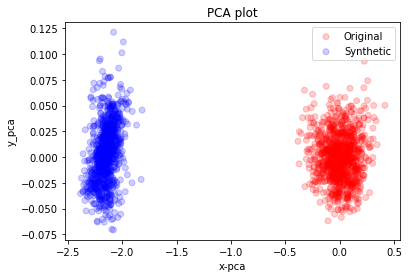

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.093s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.018775
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.455276
[t-SNE] KL divergence after 300 iterations: 0.943339


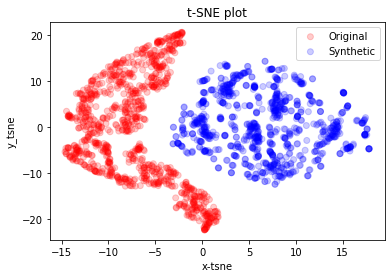

In [9]:
# visualization
visualization(ori_data, syn_data, 'pca')
visualization(ori_data, syn_data, 'tsne')